# Employee Evaluation for Promotion

## Problem:

The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.
So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.
Need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

## Data Dictionary

• employeeid: Unique ID for the employee.

• department: Department of employee 

• region: Region of employment (unordered) 

• education: Education Level 

• gender: Gender of Employee 

• recruitmentchannel: Channel of recruitment for employee

• no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.

• age: Age of Employee

• previous_ year_ rating: Employee Rating for the previous year

• length_ of_ service: Length of service in years

• awards_ won: if awards won during the previous year then 1 else 0

• avg_ training_ score: Average score in current training evaluations

• is_promoted: (Target) Recommended for promotion

# Reading and describing data

In [1]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

data = pd.read_csv('employee_promotion.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [3]:
# checking number of rows and columns

print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

Number of rows: 54808
Number of columns: 13


In [4]:
# checking info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
# checking statistics

data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# Exploratory Data Analysis

# Univariate Analysis

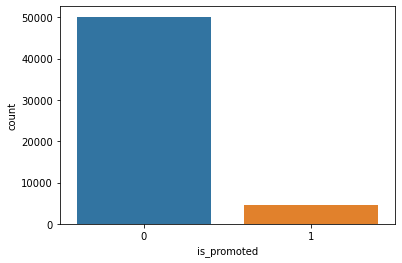

In [6]:
# Target Column  ('is_promoted')

plt.figure(figsize=(6, 4))
sns.countplot(x=data['is_promoted'])
plt.show()

In [7]:
data["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
data["is_promoted"].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

Inference: The target column is unbalanced. 91% and 9% ratio is very unbalanced.

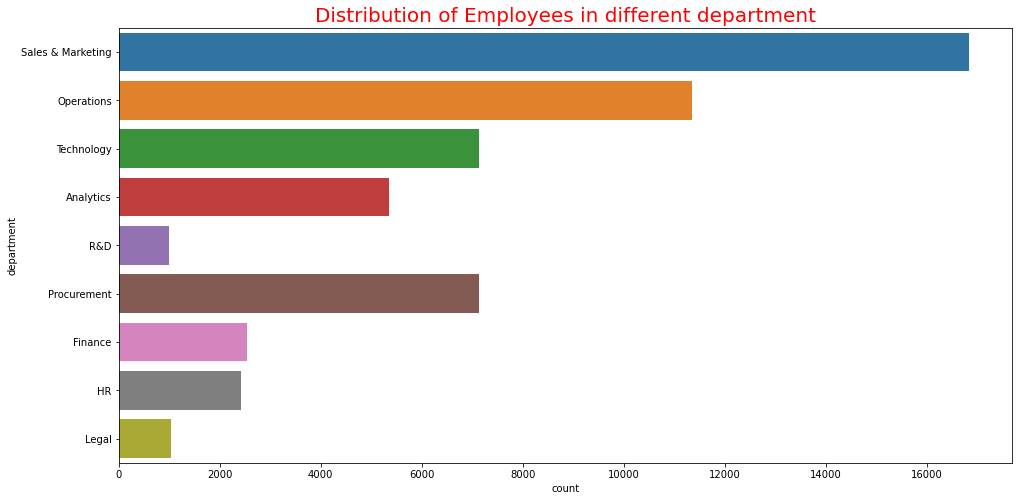

In [9]:
# Distribution of Employees in different department

plt.figure(figsize=(16,8))
sns.countplot(y=data['department'])
plt.title('Distribution of Employees in different department', color='red', fontsize=20)
plt.show()

Most of the employees are working in 'Sales & Marketing' and least number of employees are from 'Legal' department.

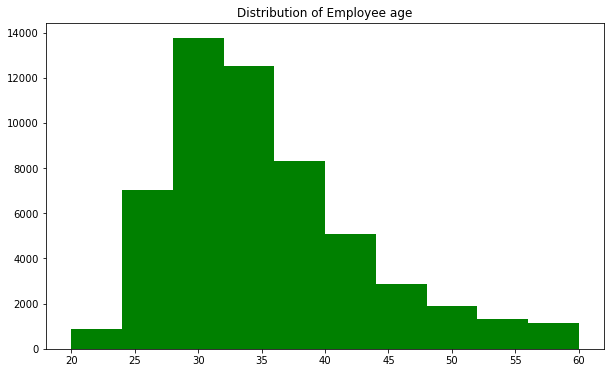

In [10]:
# Distribution of Employee age

plt.figure(figsize=(10,6))
plt.hist(x=data['age'], color='green')
plt.title('Distribution of Employee age')
plt.show()

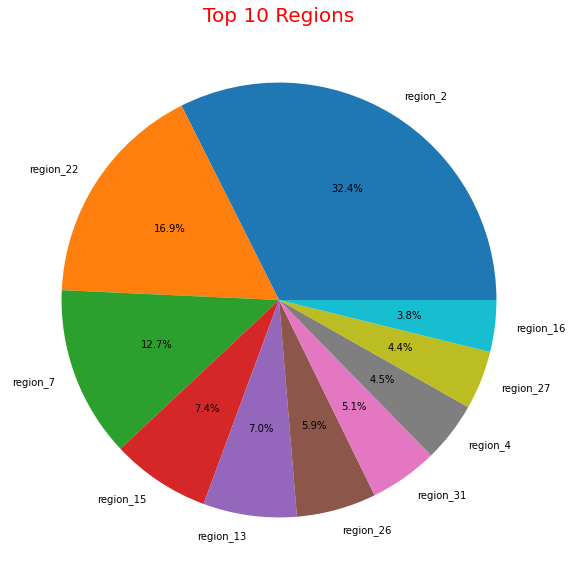

In [11]:
# Top 10 region of employment

plt.figure(figsize=(10,10))
plt.pie(data['region'].value_counts().head(10), labels=data['region'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Regions', color='red', fontsize=20)
plt.show()

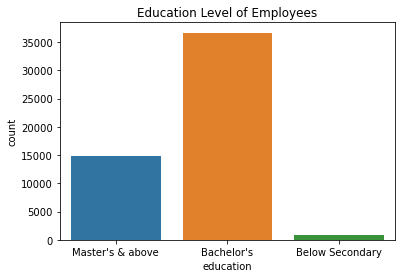

In [12]:
# distribution of education

plt.figure()
sns.countplot(x=data['education'])
plt.title('Education Level of Employees')
plt.show()

Most of the employees have a Bachelor's degree and very few employees are having below Secondary education

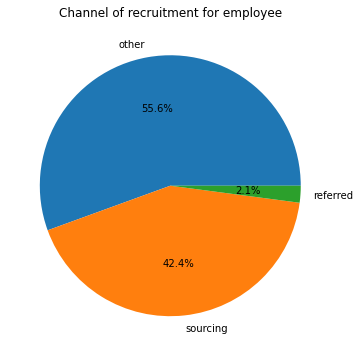

In [13]:
# Recruitement Channel
plt.figure(figsize=(6,6))
plt.pie(data['recruitment_channel'].value_counts(), labels=data['recruitment_channel'].value_counts().index, autopct='%1.1f%%')
plt.title('Channel of recruitment for employee')
plt.show()

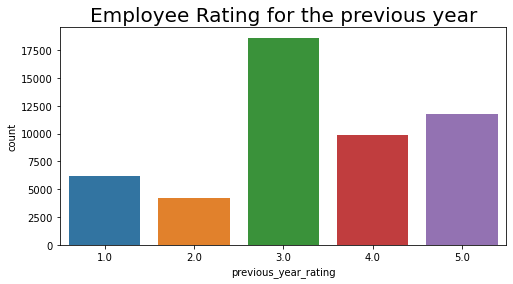

In [14]:
# previous year ratings

plt.figure(figsize=(8,4))
sns.countplot(x=data['previous_year_rating'])
plt.title('Employee Rating for the previous year', fontsize=20)
plt.show()

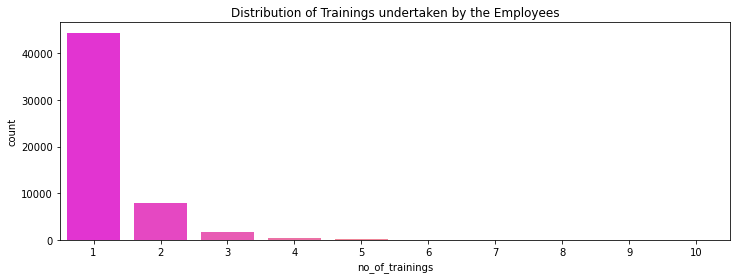

In [15]:
# Distribution of Trainings undertaken by Employees

plt.figure(figsize=(12,4))
sns.countplot(x=data['no_of_trainings'], palette = 'spring')
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

Most of the Employees had undergone only one traning session.

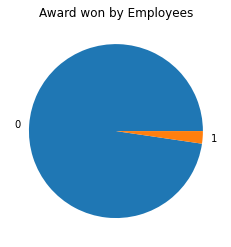

In [16]:
# Awards won by Employees

plt.pie(data['awards_won'].value_counts(), labels=[0,1])
plt.title('Award won by Employees')
plt.show()

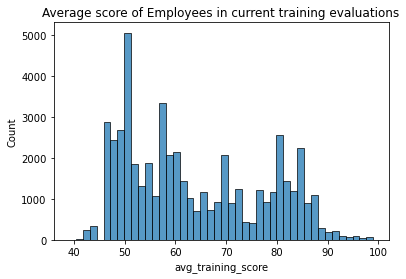

In [17]:
#Distribution of Average score of Employees in current training evaluations

sns.histplot(x=data['avg_training_score'])
plt.title('Average score of Employees in current training evaluations')
plt.show()

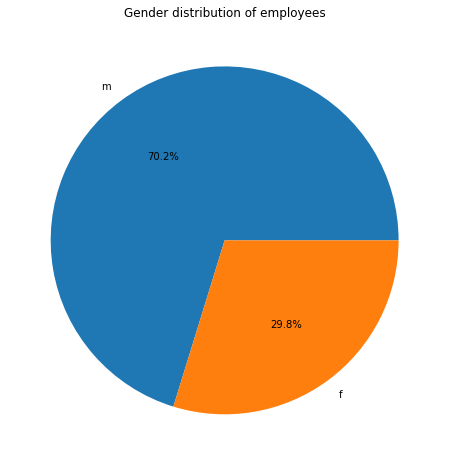

In [18]:
# Gender Distribution of Employees

gender_count = data['gender'].value_counts()
labels=data['gender'].value_counts().index
plt.figure(figsize=(8,8))
plt.pie(gender_count, labels=labels, autopct='%1.1f%%')
plt.title('Gender distribution of employees')
plt.show()

Most of the company employees are male

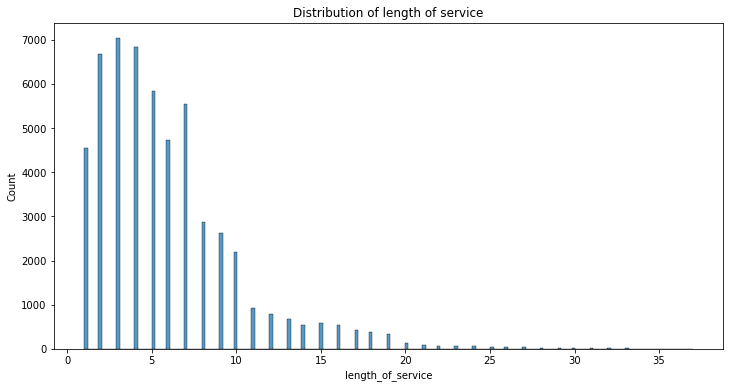

In [19]:
# Distribution of length of service

plt.figure(figsize=(12,6))
sns.histplot(x=data['length_of_service'])
plt.title('Distribution of length of service')
plt.show()

Length of service is from 1 to 10 years. After 10 years, there are few employees. Most of the employees stay in service for approximately three years

## Bivariate

In [20]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

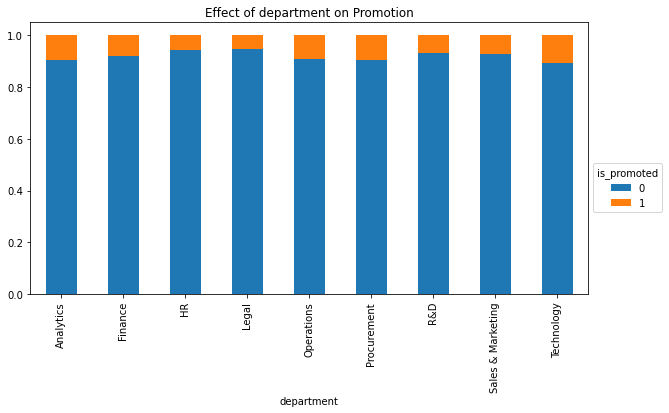

In [21]:
# Effect of different departments on promotion

ct = pd.crosstab(data['department'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Effect of department on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

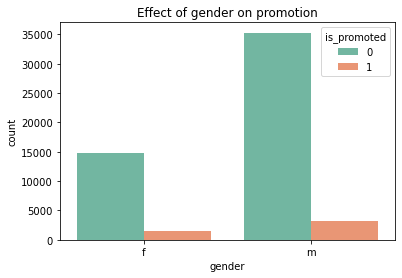

In [22]:
#Effect of gender on promotion

sns.countplot(x='gender', hue='is_promoted', data=data, palette='Set2')
plt.title('Effect of gender on promotion')
plt.show()

Though female employees are minority, they are competing with the male employees when it comes to promotion

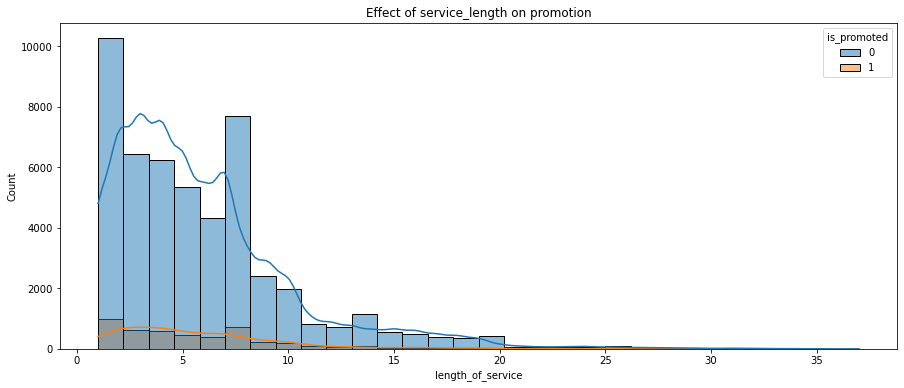

In [23]:
# Effect of service_length on promotion

plt.figure(figsize=(15,6))
sns.histplot(x='length_of_service', hue='is_promoted', data=data, bins=30, kde=True, common_norm=True)
plt.title('Effect of service_length on promotion')
plt.show()

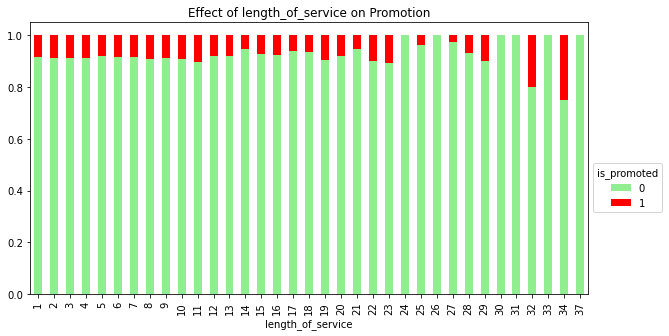

In [24]:
ct = pd.crosstab(data['length_of_service'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5), color=['LightGreen', 'red'])
plt.title('Effect of length_of_service on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

From years 1 to 23, employees are getting promoted 

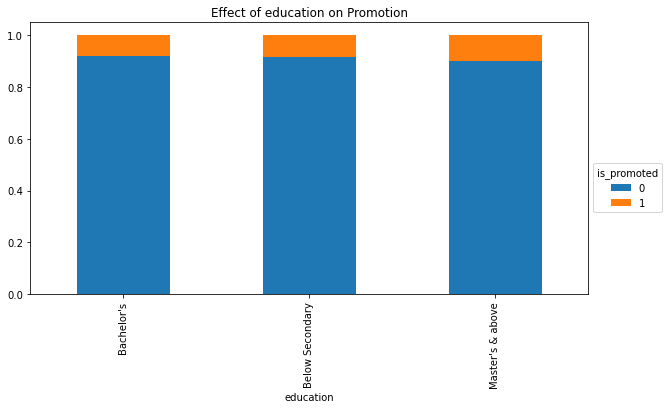

In [25]:
# Effect of Education on Promotion

ct = pd.crosstab(data['education'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Effect of education on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Educational Qualification of employees do not have much effect on promotion

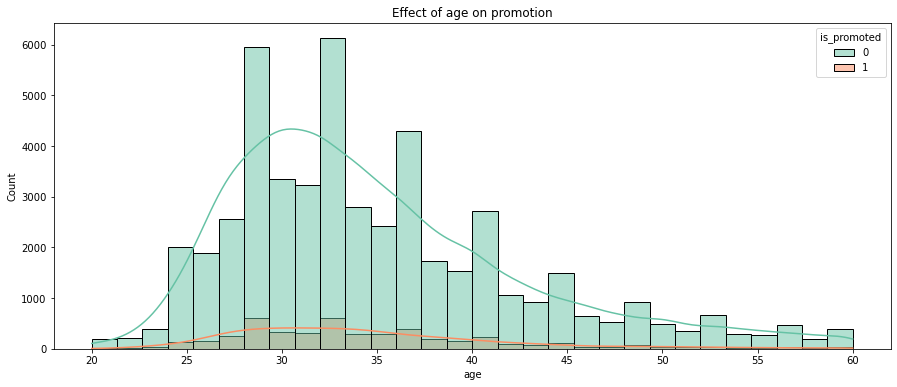

In [26]:
# Effect of age on promotion

plt.figure(figsize=(15,6))
sns.histplot(x='age', hue='is_promoted', data=data, bins=30, kde=True, palette='Set2')
plt.title('Effect of age on promotion')
plt.show()

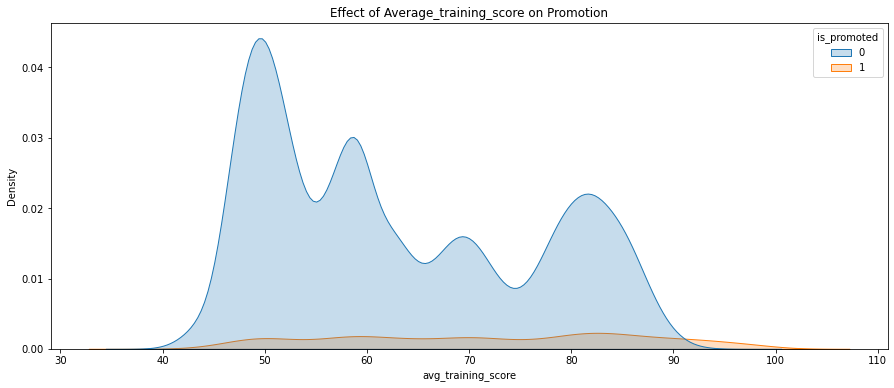

In [27]:
#Effect of Average_training_score on Promotion

plt.figure(figsize=(15,6))
sns.kdeplot(x='avg_training_score', hue='is_promoted', data=data, shade=True)
plt.title('Effect of Average_training_score on Promotion')
plt.show()

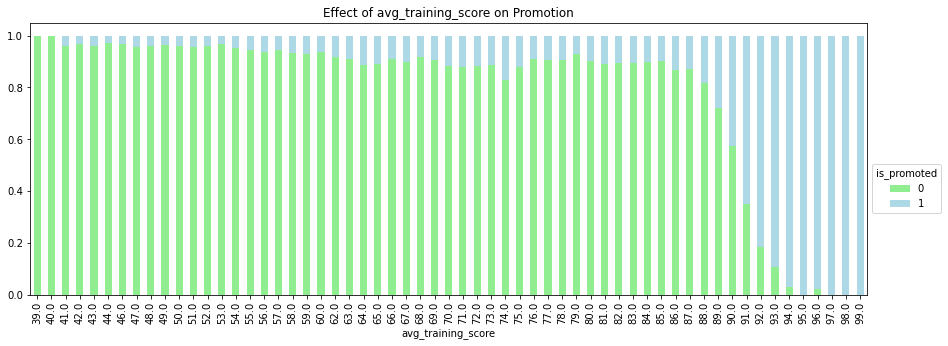

In [28]:
ct = pd.crosstab(data['avg_training_score'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(15,5),color=['LightGreen','LightBlue'])
plt.title('Effect of avg_training_score on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

If averge training score is high then chances of getting promoted is high.

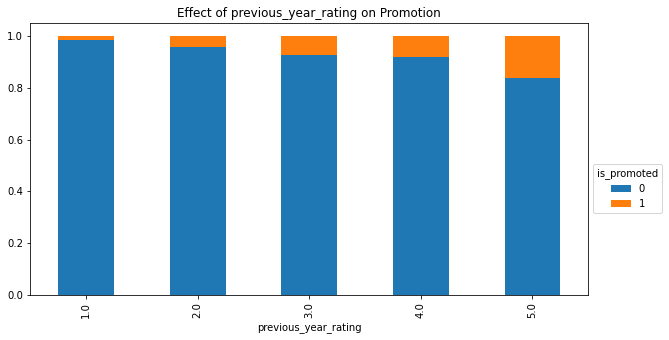

In [29]:
# Effect of Previous Year Rating on Promotion

ct = pd.crosstab(data['previous_year_rating'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Effect of previous_year_rating on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Greater the previous year rating, greater the chance of Promotion

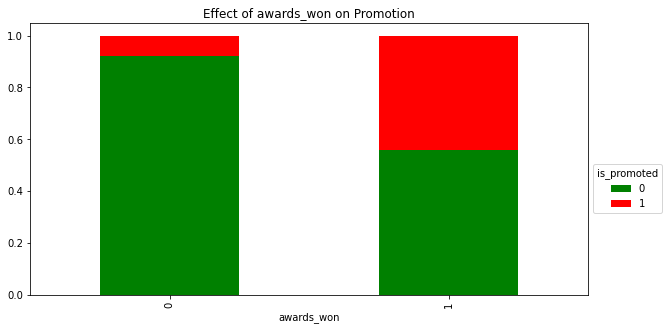

In [30]:
#'Effect of awards_won on Promotion'

ct = pd.crosstab(data['awards_won'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5), color=['green','red'])
plt.title('Effect of awards_won on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Winning awards increases the chance of promotion.

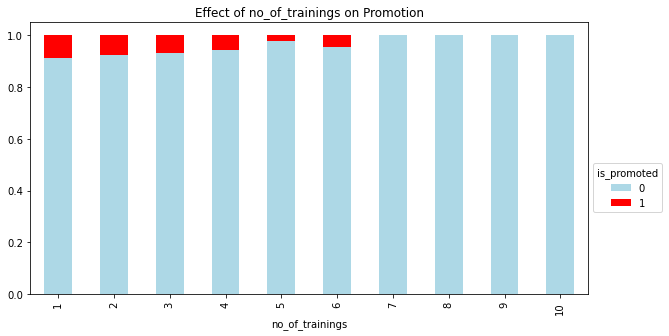

In [31]:
# Effect of number_of_trainings on promotion

ct = pd.crosstab(data['no_of_trainings'], data['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,5), color=['LightBlue','red'])
plt.title('Effect of no_of_trainings on Promotion')
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Undertaking 1 to 6 number of training, employees are getting promoted.

## Multivariate Analysis

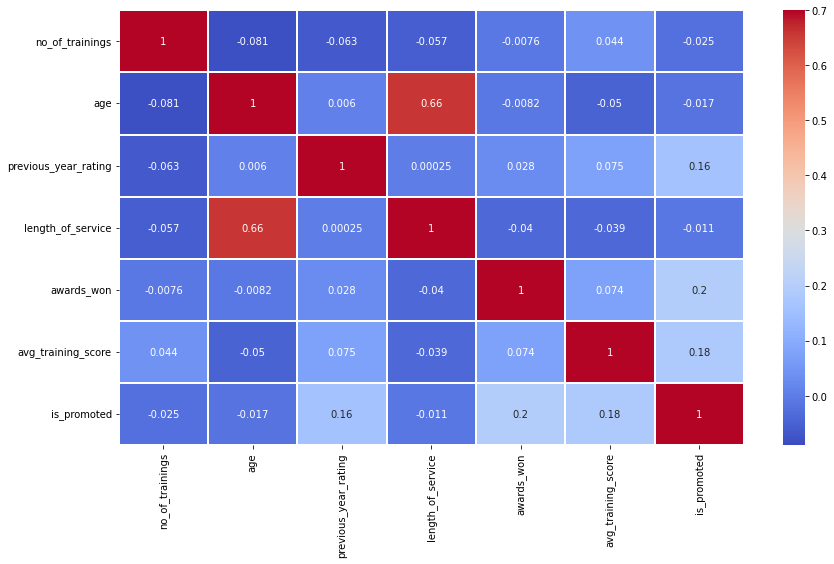

In [32]:
# Correlation between numeric features

plt.subplots(figsize=(14,8))
sns.heatmap(data=data.drop('employee_id', axis=1).corr(), vmin=-0.09, vmax=0.7, annot=True, linewidth=0.2, cmap='coolwarm')
plt.show()

'awards won', 'avg_training_score', 'previous year ratings' are having some positive correlation with promotion.

# Preprocessing

In [33]:
# droping 'employee id' as its not an useful column

data.drop('employee_id', axis=1, inplace=True)

### a) null values

In [34]:
# checking for null values

data.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [35]:
# percentage of null values 

percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

In [36]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [37]:
# Handling Null Values

# Filling null values in 'edcation' and 'avarage_training_score' with most frequent value
data['education']=data['education'].fillna(data['education'].mode()[0])
data['avg_training_score']=data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [38]:
# checking data of previous year rating
data[data['previous_year_rating'].isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,77.0,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70.0,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44.0,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49.0,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54703,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88.0,0
54734,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56.0,1
54746,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,50.0,0
54773,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,50.0,0


In [39]:
data[data['previous_year_rating'].isnull()].value_counts(data['length_of_service'])

length_of_service
1    4124
dtype: int64

Since all the employees with null values in "previous year rating" have only one year of service at the company, they cant have any rating. Therefore filling those null values with 0

In [40]:
# Filling null values in 'previous_year_rating' with value 0

data['previous_year_rating']=data['previous_year_rating'].fillna(value=0)

In [41]:
# checking for null values:
data.isna().sum().sum()

0

No null values present in our features now

### b) Outliers

In [42]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

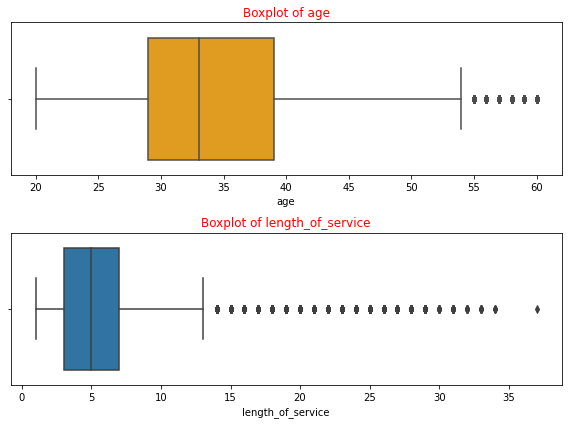

In [43]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
sns.boxplot(x=data['age'], color='Orange')
plt.title('Boxplot of age', color='Red')

plt.subplot(2,1,2)
sns.boxplot(x=data['length_of_service'])
plt.title('Boxplot of length_of_service', color='Red')

plt.tight_layout()
plt.show()

In [44]:
# determining number of outliers in lenth_of_service column

Q1=np.percentile(data['length_of_service'], 25, interpolation='midpoint')
Q2=np.percentile(data['length_of_service'], 50, interpolation='midpoint')
Q3=np.percentile(data['length_of_service'], 75, interpolation='midpoint')
IQR = Q3-Q1
upper_limit=round(Q3+(1.5 * IQR), 4)
lower_limit=round(Q1-(1.5 * IQR), 4)
outlier=[]
for x in data['length_of_service']:
    if (x<lower_limit) or (x>upper_limit):
        outlier.append(x)
print(' Q1: ',Q1,'\n',
      'Q2: ',Q2,'\n',
      'Q3: ',Q3)
print('Upper limit: ',upper_limit)
print('Lower limit: ',lower_limit)
print('Number of outliers in length_of_service column: ',len(outlier))

 Q1:  3.0 
 Q2:  5.0 
 Q3:  7.0
Upper limit:  13.0
Lower limit:  -3.0
Number of outliers in length_of_service column:  3489


In [45]:
# handling outliers

data['length_of_service']=np.where(data['length_of_service']>upper_limit,upper_limit,np.where(data['length_of_service']<lower_limit,lower_limit,data['length_of_service']))

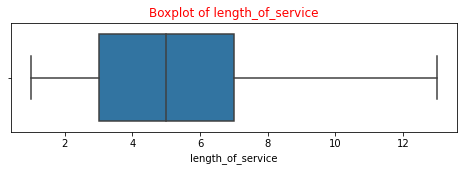

In [46]:
# Checking for outliers in length_of_service:

plt.figure(figsize=(8,2))
sns.boxplot(x=data['length_of_service'])
plt.title('Boxplot of length_of_service', color='Red')
plt.show()

Outliers in 'length of service' is handled. Spread of outliers in 'age' is low. So we are negleting handling outliers in age column.

### c) Feature engineering

In [47]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [48]:
# creating a new column 'total training score'
data['total_training_score'] = data['avg_training_score'] * data['no_of_trainings']

In [49]:
data['total_training_score']

0         49.0
1         60.0
2         50.0
3        100.0
4         73.0
         ...  
54803     78.0
54804     56.0
54805     79.0
54806     50.0
54807     49.0
Name: total_training_score, Length: 54808, dtype: float64

In [50]:
# changing type of new column to float
data['total_training_score'] = data['total_training_score'].astype('float64')

In [51]:
# creating new column 'sum metric'
data['sum_metric'] = data['total_training_score'] + data['awards_won'] + data['previous_year_rating']

In [52]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score,sum_metric
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.0,0,49.0,0,49.0,54.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.0,0,60.0,0,60.0,65.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.0,0,50.0,0,50.0,53.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10.0,0,50.0,0,100.0,101.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2.0,0,73.0,0,73.0,76.0


### d) Encoding

In [53]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service       float64
awards_won                int64
avg_training_score      float64
is_promoted               int64
total_training_score    float64
sum_metric              float64
dtype: object

In [54]:
data.nunique()

department                9
region                   34
education                 3
gender                    2
recruitment_channel       3
no_of_trainings          10
age                      41
previous_year_rating      6
length_of_service        13
awards_won                2
avg_training_score       59
is_promoted               2
total_training_score    239
sum_metric              364
dtype: int64

In [55]:
# label encoding of features with more unique values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data[['department', 'region']] = data[['department', 'region']].apply(le.fit_transform)

In [56]:
# one hot encoding of features with less unique values
data = pd.get_dummies(data)

In [57]:
data.head(10)

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score,sum_metric,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8.0,0,49.0,0,49.0,54.0,0,0,1,1,0,0,0,1
1,4,14,1,30,5.0,4.0,0,60.0,0,60.0,65.0,1,0,0,0,1,1,0,0
2,7,10,1,34,3.0,7.0,0,50.0,0,50.0,53.0,1,0,0,0,1,0,0,1
3,7,15,2,39,1.0,10.0,0,50.0,0,100.0,101.0,1,0,0,0,1,1,0,0
4,8,18,1,45,3.0,2.0,0,73.0,0,73.0,76.0,1,0,0,0,1,1,0,0
5,0,11,2,31,3.0,7.0,0,85.0,0,170.0,173.0,1,0,0,0,1,0,0,1
6,4,12,1,31,3.0,5.0,0,59.0,0,59.0,62.0,1,0,0,1,0,1,0,0
7,4,27,1,33,3.0,6.0,0,63.0,0,63.0,66.0,0,0,1,0,1,0,0,1
8,0,12,1,28,4.0,5.0,0,83.0,0,83.0,87.0,1,0,0,0,1,1,0,0
9,7,0,1,32,5.0,5.0,0,54.0,0,54.0,59.0,0,0,1,0,1,0,0,1


In [58]:
data.dtypes

department                        int32
region                            int32
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service               float64
awards_won                        int64
avg_training_score              float64
is_promoted                       int64
total_training_score            float64
sum_metric                      float64
education_Bachelor's              uint8
education_Below Secondary         uint8
education_Master's & above        uint8
gender_f                          uint8
gender_m                          uint8
recruitment_channel_other         uint8
recruitment_channel_referred      uint8
recruitment_channel_sourcing      uint8
dtype: object

### e) Feature Reduction

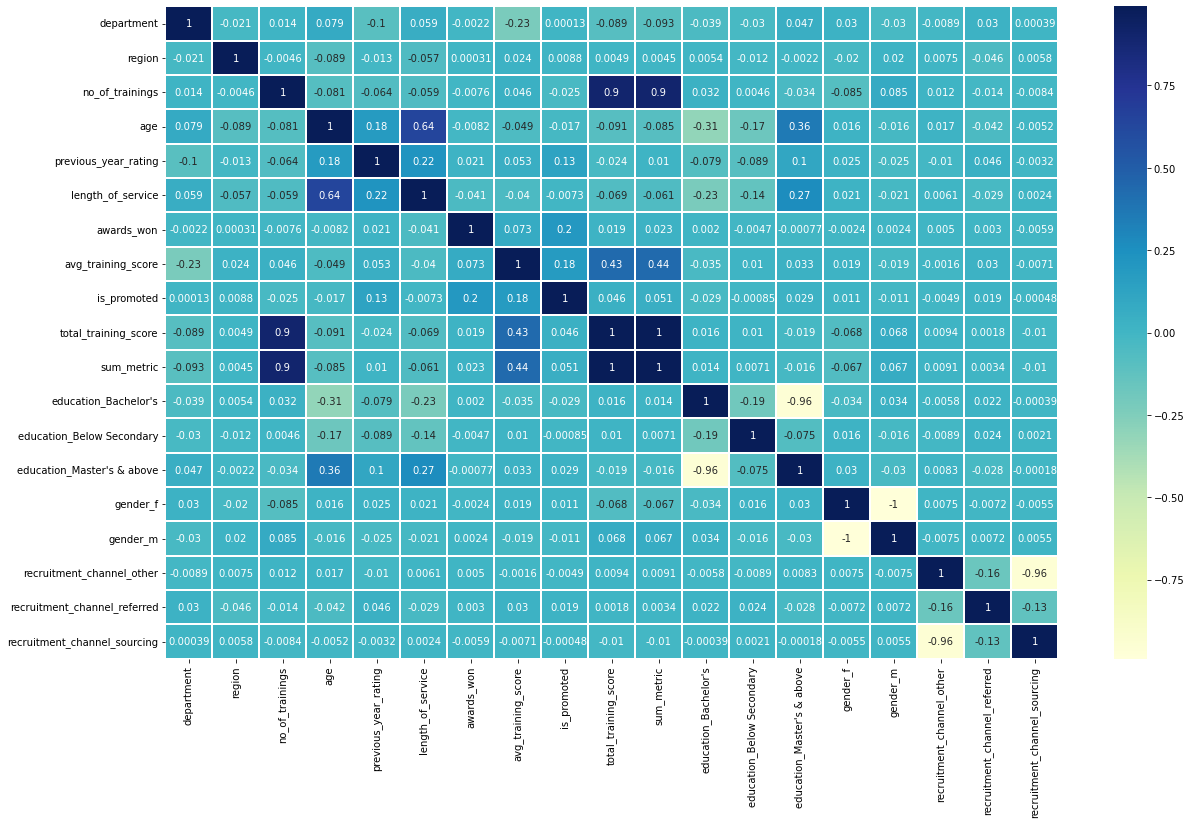

In [59]:
# checking corerelation
plt.subplots(figsize=(20,12))
sns.heatmap(data=data.corr(), vmin=-0.99, vmax=0.99, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.show()

Lets drop 'department' and 'region' columns as they are very least related to promotion of an employee.

In [60]:
# droping columns with least correlation with promotion

data.drop(['department', 'region'],axis=1, inplace=True)

In [61]:
print('Number of columns after feature reduction: ',len(data.columns))

Number of columns after feature reduction:  17


### f) Splitting the data

In [62]:
# splitting the data into dependent and independent variable

y = data['is_promoted']
X= data.drop(['is_promoted'], axis=1)

print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (54808, 16)
shape of y:  (54808,)


### g) Feature Scaling

In [63]:
X.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,total_training_score,sum_metric,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.078748,5.570829,0.023172,63.071760,79.409812,82.511732,0.712998,0.014688,0.272314,0.297621,0.702379,0.555503,0.020836,0.423661
std,0.609264,7.660169,1.496458,3.414373,0.150450,13.515692,43.932159,43.925119,0.452367,0.120300,0.445155,0.457216,0.457216,0.496914,0.142838,0.494142
min,1.000000,20.000000,0.000000,1.000000,0.000000,39.000000,39.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,2.000000,3.000000,0.000000,50.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,59.000000,64.000000,68.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,84.000000,87.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,10.000000,60.000000,5.000000,13.000000,1.000000,99.000000,710.000000,713.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# MinMax Scaling

min_max = preprocessing.MinMaxScaler()
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [65]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.028112,0.370098,0.615750,0.380902,0.023172,0.401196,0.060223,0.063168,0.712998,0.014688,0.272314,0.297621,0.702379,0.555503,0.020836,0.423661
std,0.067696,0.191504,0.299292,0.284531,0.150450,0.225262,0.065473,0.065268,0.452367,0.120300,0.445155,0.457216,0.457216,0.496914,0.142838,0.494142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.225000,0.400000,0.166667,0.000000,0.183333,0.019374,0.022288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.325000,0.600000,0.333333,0.000000,0.333333,0.037258,0.041605,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.475000,0.800000,0.500000,0.000000,0.616667,0.067064,0.069837,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Machine Learning - Predictive Modeling

In [66]:
y.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

As we have already seen, our target column is highly imbalanced. So we need to perform either oversampling or undersampling inorder to balance the data.

### Resampling

In [67]:
# OverSampling by SMOTE method

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_up, y_up = smote.fit_resample(X, y)

In [68]:
# checking target column to make sure its balanced

y_up.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_promoted, dtype: float64

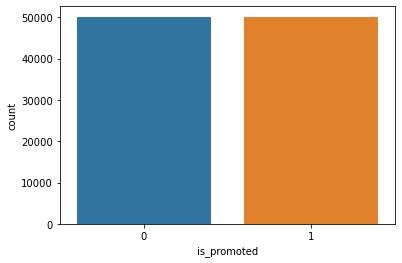

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_up)
plt.show()

Data is now balanced

### Splitting into train and test data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, random_state=42, test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (75210, 16)
Shape of X_test:  (25070, 16)
Shape of y_train:  (75210,)
Shape of y_test:  (25070,)


### Predictive Modeling

In [71]:
# importing necessary libraries to get the test results

from sklearn.metrics import accuracy_score, f1_score, classification_report

#to get a consolidated test result:
results = {'Classification Model':[], 'F1 Score':[]}

## a) Logestic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: LogisticRegression
F1 Score:  0.6595
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67     12647
           1       0.66      0.63      0.65     12423

    accuracy                           0.66     25070
   macro avg       0.66      0.66      0.66     25070
weighted avg       0.66      0.66      0.66     25070



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## b) kNN

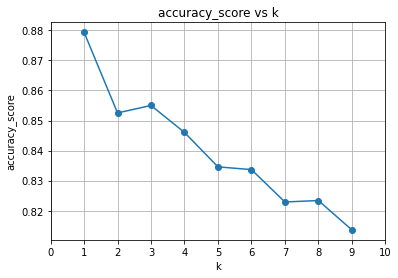

In [73]:
# Finding the optimum k value
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    clf=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
# plotting k vs accuracy_score to get optimum k
plt.plot(neighbors, values, 'o-')
plt.title('accuracy_score vs k')
plt.xticks(np.arange(0.0, 11.0, 1.0))
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.grid()
plt.show()

In [74]:
# performing test with k=1

clf=KNeighborsClassifier(n_neighbors=1, metric='minkowski')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: KNeighborsClassifier
F1 Score:  0.8793
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88     12647
           1       0.86      0.91      0.88     12423

    accuracy                           0.88     25070
   macro avg       0.88      0.88      0.88     25070
weighted avg       0.88      0.88      0.88     25070



## c) SVM

In [75]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: SVC
F1 Score:  0.6786
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69     12647
           1       0.69      0.64      0.67     12423

    accuracy                           0.68     25070
   macro avg       0.68      0.68      0.68     25070
weighted avg       0.68      0.68      0.68     25070



## d) Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: DecisionTreeClassifier
F1 Score:  0.9123
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     12647
           1       0.91      0.91      0.91     12423

    accuracy                           0.91     25070
   macro avg       0.91      0.91      0.91     25070
weighted avg       0.91      0.91      0.91     25070



## e) Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: RandomForestClassifier
F1 Score:  0.9319
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     12647
           1       0.94      0.92      0.93     12423

    accuracy                           0.93     25070
   macro avg       0.93      0.93      0.93     25070
weighted avg       0.93      0.93      0.93     25070



## f) Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: GradientBoostingClassifier
F1 Score:  0.8661
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     12647
           1       0.90      0.82      0.86     12423

    accuracy                           0.87     25070
   macro avg       0.87      0.87      0.87     25070
weighted avg       0.87      0.87      0.87     25070



## g) Xtreme Gradient Boosting Classifier

In [79]:
import xgboost as xgb

clf = xgb.XGBClassifier(use_label_encoder =False)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

[10:35:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Model: XGBClassifier
F1 Score:  0.9519
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     12647
           1       0.99      0.91      0.95     12423

    accuracy                           0.95     25070
   macro avg       0.96      0.95      0.95     25070
weighted avg       0.96      0.95      0.95     25070



## h) Gaussian NaiveBayes Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB  

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: GaussianNB
F1 Score:  0.6118
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.87      0.71     12647
           1       0.75      0.39      0.52     12423

    accuracy                           0.63     25070
   macro avg       0.67      0.63      0.61     25070
weighted avg       0.67      0.63      0.61     25070



## i) Bagging Classifier

In [81]:
from sklearn.ensemble import BaggingClassifier  

clf = BaggingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: BaggingClassifier
F1 Score:  0.9313
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     12647
           1       0.95      0.91      0.93     12423

    accuracy                           0.93     25070
   macro avg       0.93      0.93      0.93     25070
weighted avg       0.93      0.93      0.93     25070



## j) AdaBoost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier  

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

if clf.__class__.__name__ not in results['Classification Model']:
    results['Classification Model'].append(clf.__class__.__name__)
    results['F1 Score'].append(f1_score(y_test, y_pred, average='macro').round(4))

Classification Model: AdaBoostClassifier
F1 Score:  0.7286
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73     12647
           1       0.73      0.72      0.72     12423

    accuracy                           0.73     25070
   macro avg       0.73      0.73      0.73     25070
weighted avg       0.73      0.73      0.73     25070



# Consolidated Result:

In [83]:
ConResult = pd.DataFrame(results)
ConResult

,Classification Model,F1 Score
0,LogisticRegression,0.6595
1,KNeighborsClassifier,0.8793
2,SVC,0.6786
3,DecisionTreeClassifier,0.9123
4,RandomForestClassifier,0.9319
5,GradientBoostingClassifier,0.8661
6,XGBClassifier,0.9519
7,GaussianNB,0.6118
8,BaggingClassifier,0.9313
9,AdaBoostClassifier,0.7286


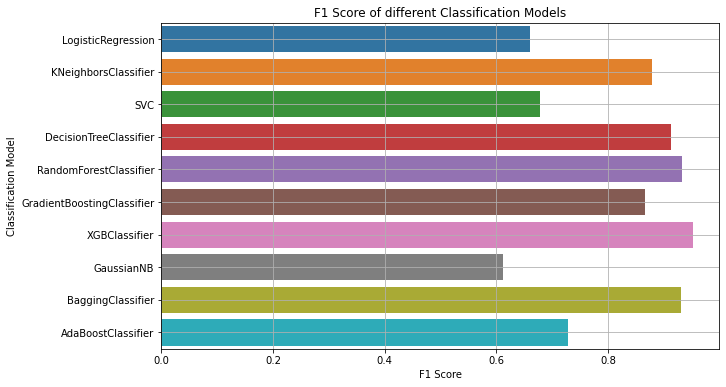

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Classification Model', data=results)
plt.title('F1 Score of different Classification Models')
plt.xlabel('F1 Score')
plt.ylabel('Classification Model')
plt.grid()
plt.show()

XGBClassifier is giving highest f1_score. Random Forest Classifier also performs well with second highest f1_score.
So we do some fine tuning of these two models to improve its performance.

# Hyperparameter Tuning

Since we already have a high f1_score we are not performing feature engineeering again, instead we do some hyper parameter tuning.

### Fine Tuning of XGB Classifier

In [85]:
# default parameters of xgb

XGB = xgb.XGBClassifier()
XGB.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)>

In [96]:
# tuning some parameter values and checking for improvement

XGB1 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        use_label_encoder=False)
XGB1.fit(X_train, y_train)
y_pred = XGB1.predict(X_test)
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

[13:29:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.9529


F1_score increased. We further tune the model.

#### Tuning using GridSearchCV

In [88]:
# Tuning max_depth and min_child_weight
param_test1 = {
    'max_depth' : range(3, 10, 2),
    'min_child_weight' : range(1, 8, 2)
}

from sklearn.model_selection import GridSearchCV

gsearch1 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, gamma=0,
                                                subsample=0.8, colsample_bytree=0.8, use_label_encoder=False),
                       param_grid=param_test1, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch1.fit(X_train, y_train)

print('Best parameters: ',gsearch1.best_params_)
print('Score: ',gsearch1.best_score_)

[11:36:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'max_depth': 9, 'min_child_weight': 1}
Score:  0.951963192603927


In [89]:
# deep check for optimum max_depth
param_test2 = {
    'max_depth' : [8, 9, 10]
}
gsearch2 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, min_child_weight=1, gamma=0,
                                                subsample=0.8, colsample_bytree=0.8, use_label_encoder=False),
                       param_grid=param_test2, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch2.fit(X_train, y_train)

print('Best parameters: ',gsearch2.best_params_)
print('f1_Score: ',gsearch2.best_score_)

[11:57:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'max_depth': 10}
f1_Score:  0.9526838035266014


In [94]:
# deep check for optimum max_depth
param_test3 = {
    'n_estimators': range(50, 400, 50),
    'max_depth' : [8, 9, 10, 11]
}
gsearch3 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, min_child_weight=1, gamma=0,
                                                subsample=0.8, colsample_bytree=0.8, use_label_encoder=False),
                       param_grid=param_test3, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch3.fit(X_train, y_train)

print('Best parameters: ',gsearch3.best_params_)
print('f1_Score: ',gsearch3.best_score_)

[13:07:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'max_depth': 11, 'n_estimators': 250}
f1_Score:  0.9539306619092034


We take 'n_estimators'=250, 'max_depth'=10, 'min_child_weight'=1 as optimum value.

In [95]:
# tune gamma
param_test4 = {
    'gamma' : [i/10.0 for i in range(0,10)]
}
gsearch4 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, min_child_weight=1, max_depth=10,
                                                    subsample=0.8, colsample_bytree=0.8, use_label_encoder=False),
                       param_grid=param_test4, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch4.fit(X_train, y_train)

print('Best parameters: ',gsearch4.best_params_)
print('f1_Score: ',gsearch4.best_score_)

[13:26:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'gamma': 0.1}
f1_Score:  0.9538729848025002


In [97]:
# checking model with the determined optimum values
XGB2 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=10,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                        use_label_encoder=False)
XGB2.fit(X_train, y_train)
y_pred = XGB2.predict(X_test)
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

[13:31:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.9563


Our f1_score got further improved. 

In [98]:
# Tune subsample and colsample_bytree
param_test5 = {
    'subsample':[i/10.0 for i in range(5,10)],
 'colsample_bytree':[i/10.0 for i in range(5,10)]
}

gsearch5 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, min_child_weight=1, max_depth=10,
                                                    gamma=0.1, use_label_encoder=False),
                       param_grid=param_test5, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch5.fit(X_train, y_train)

print('Best parameters: ',gsearch5.best_params_)
print('f1_Score: ',gsearch5.best_score_)

[13:59:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'colsample_bytree': 0.8, 'subsample': 0.9}
f1_Score:  0.9539594318783162


In [99]:
# deep check for optimum subsample and colsample_bytree
param_test6 = {
    'subsample':[i/100.0 for i in range(75,85,5)],
 'colsample_bytree':[i/100.0 for i in range(85,95,5)]
}

gsearch6 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, min_child_weight=1, max_depth=10,
                                                    gamma=0.1, use_label_encoder=False),
                       param_grid=param_test6, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch6.fit(X_train, y_train)

print('Best parameters: ',gsearch6.best_params_)
print('f1_Score: ',gsearch6.best_score_)

[14:08:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'colsample_bytree': 0.9, 'subsample': 0.8}
f1_Score:  0.9538297527823769


In [100]:
# Checking the model wih optimum values of 'colsample_bytree' & 'subsample' as 0.85
XGB3 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=10,
                        min_child_weight=1, gamma=0.1, subsample=0.85, colsample_bytree=0.85,
                        use_label_encoder=False)
XGB3.fit(X_train, y_train)
y_pred = XGB3.predict(X_test)
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

[14:13:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.9562


In [101]:
# Tuning Regularization Parameters
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, min_child_weight=1, max_depth=10,
                                                    gamma=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False),
                       param_grid=param_test7, scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch7.fit(X_train, y_train)

print('Best parameters: ',gsearch7.best_params_)
print('f1_Score: ',gsearch7.best_score_)

[14:27:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters:  {'reg_alpha': 1e-05}
f1_Score:  0.9538729848025002


In [102]:
# Checking the model with determined optimum values:
XGB4 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=10,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-05,
                        use_label_encoder=False)
XGB4.fit(X_train, y_train)
y_pred = XGB4.predict(X_test)
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

[14:40:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.9563


Our XGB4 model have the highest f1_score (95.63%). By fine tuning of hyperparameters we could improve the f1_score from 95.19% to 95.63%.

In [104]:
# classification chart of XGB4 model
import time
start = time.time()
XGB4 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=10,
                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-05,
                        use_label_encoder=False)
XGB4.fit(X_train, y_train)
stop = time.time()
y_pred = XGB4.predict(X_test)
XGB4_time = stop-start
print('Classification Model: {}'.format(XGB4.__class__.__name__))
print('Execution time is: ',XGB4_time,'seconds')
print('Classification Report: \n',classification_report(y_test, y_pred))

[15:10:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Model: XGBClassifier
Execution time is:  33.98173475265503 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     12647
           1       0.99      0.92      0.95     12423

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070



## Fine tuning of Random Forest Classifier

In [112]:
# getting parameters of RandomForest
RF = RandomForestClassifier()
RF.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### fine tuning of RF Classifier using GridSearchCV

In [117]:
param_grid1 = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': range(2,11,2)
}
    
gsearch8 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid1,
                        scoring='f1', n_jobs=4, cv=3, return_train_score=True)
gsearch8.fit(X_train, y_train)

print('Best parameters: ',gsearch8.best_params_)
print('f1 Score: ',gsearch8.best_score_)

Best parameters:  {'max_depth': 10, 'n_estimators': 200}
f1 Score:  0.7964757784194214


In [126]:
param_grid2 = {
    'n_estimators': [ 150, 200, 250],
    'max_depth': range(10,40,10)
}
    
gsearch9 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid2,
                        scoring='f1', n_jobs=4, cv=3, return_train_score=True)
gsearch9.fit(X_train, y_train)

print('Best parameters: ',gsearch9.best_params_)
print('f1 Score: ',gsearch9.best_score_)

Best parameters:  {'max_depth': 30, 'n_estimators': 200}
f1 Score:  0.9240008302509836


In [127]:
param_grid3 = {
    'min_samples_leaf': [1, 5, 10]
}
    
gsearch10 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, max_depth = 30), param_grid=param_grid3,
                        scoring='f1', n_jobs=4, cv=3, return_train_score=True)
gsearch10.fit(X_train, y_train)

print('Best parameters: ',gsearch10.best_params_)
print('f1 Score: ',gsearch10.best_score_)

Best parameters:  {'min_samples_leaf': 1}
f1 Score:  0.9227672544038795


In [128]:
param_grid4 = {
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
    
gsearch11 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=1),
                         param_grid=param_grid4,
                        scoring='f1', n_jobs=4, cv=5, return_train_score=True)
gsearch11.fit(X_train, y_train)

print('Best parameters: ',gsearch11.best_params_)
print('f1 Score: ',gsearch11.best_score_)

Best parameters:  {'bootstrap': True, 'max_features': 'auto'}
f1 Score:  0.9281175187230882


In [129]:
RF1 = RandomForestClassifier( n_estimators=200, max_depth=30, max_features='auto')
RF1.fit(X_train, y_train)
y_pred = RF1.predict(X_test)
print('F1 Score: ',f1_score(y_test, y_pred, average='macro').round(4))

F1 Score:  0.9324


F1_score improved to 93.24% after fine tuning.

In [130]:
# classification chart of RF model
start = time.time()
RF1 = RandomForestClassifier( n_estimators=200, max_depth=30, max_features='auto')
RF1.fit(X_train, y_train)
stop = time.time()
y_pred = RF1.predict(X_test)
RF1_time = stop-start
print('Classification Model: {}'.format(RF1.__class__.__name__))
print('Execution time is: ',RF1_time,'seconds')
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Model: RandomForestClassifier
Execution time is:  46.38824272155762 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     12647
           1       0.94      0.92      0.93     12423

    accuracy                           0.93     25070
   macro avg       0.93      0.93      0.93     25070
weighted avg       0.93      0.93      0.93     25070



# Inference:

XGB Model gives highest f1_score (0.96) and it takes only 33.98 seconds for execution.

RF classifier have a f1_score of 0.9324 and it takes 46.38 seconds for execution.